CFD Sources: 
1. https://github.com/emhayki/CFD-Fundamental/blob/main/CFD-Fundamental-Guide.pdf
2. https://github.com/barbagroup/CFDPython/blob/master/lessons/01_Step_1.ipynb


Theory sources: 
3. https://www.math.toronto.edu/jko/APM346_summary_2_2020.pdf
4. https://youtu.be/ec7L8wRABy4
5. http://www.cs.man.ac.uk/~fumie/tmp/introductory-finite-difference-methods-for-pdes.pdf

## Analysis, derivation and discretization of the 1D-Linear Convection Equation

In [4]:
from IPython.display import Image

$$
\begin{eqnarray}
    \rho \left( \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} + w \frac{\partial u}{\partial z} \right) = -\frac{\partial p}{\partial x} + \mu \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} + \frac{\partial^2 u}{\partial z^2} \right) + f_x \\
    \rho \left( \frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} + w \frac{\partial v}{\partial z} \right) = -\frac{\partial p}{\partial y} + \mu \left( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} + \frac{\partial^2 v}{\partial z^2} \right) + f_y \\
    \rho \left( \frac{\partial w}{\partial t} + u \frac{\partial w}{\partial x} + v \frac{\partial w}{\partial y} + w \frac{\partial w}{\partial z} \right) = -\frac{\partial p}{\partial z} + \mu \left( \frac{\partial^2 w}{\partial x^2} + \frac{\partial^2 w}{\partial y^2} + \frac{\partial^2 w}{\partial z^2} \right) + f_z
\end{eqnarray}
$$

Eq. (1) is the equation for the $x$ direction, Eq. (2) for the $y$ direction, and Eq (3) for the $z$ direction

Where: $\rho$ is the fluid density

 ,$\mu$ is the dynamic viscosity

 ,$p$ is the pressure

 ,$u, v, w$ are the velocity components in the $x, y, z$ directions, respectively

 ,$f_x, f_y, f_z$ are the body force components in the $x, y, z$ directions, respectively

Derivation of the 1-D non-linear convection equation, and it's linearization assumming a 'constant velocity' $c$ of wave like propagation. 

Assumming invicid flow, no presure gradient and no body force in the x direction Eq(1) becomes:

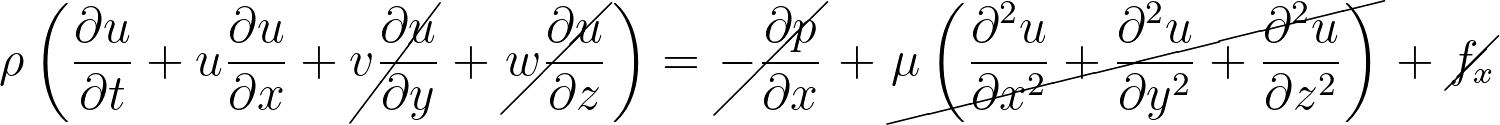

In [5]:
Image("images/simplified_ns.png")

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0 \tag{4}
$$

Eq. 4 is still a non-linear equation. To linearize it we consider $u$ to be constant, then $u = c$  

The result is the 1D linear transport equation:

$$ \frac {\partial u}{\partial t} + c \frac {\partial u}{\partial x} = 0 \tag{5}$$

where $u(x,t)$ is the quantity being transported, c is the transport velocity, $x$ is the spatial coordinate, and $t$ is time.

To solve analytically the linear transport equation consider the equation 5 in vector component form operations:

$$
0 = \frac {\partial u}{\partial t} + c \frac {\partial u}{\partial x} =\begin{bmatrix} \frac {\partial u}{\partial t} \\ \frac{\partial u}{\partial x} \end{bmatrix} \begin{bmatrix}
 1 & c \end{bmatrix} = \nabla u(t,x) \cdot (1, c) 
$$

The expression $\nabla u(t,x) \cdot (1, c)$ is the definition of the directional derivative of the function $u(t,x)$ in the direction of the vector $(1, c)$. Now defining $\vec s = (c, 1)$:

$$
\begin{equation}
D_{{s}}u = \nabla u(x,t) \cdot (c, 1) = 0 \tag {6}
\end{equation}
$$

A zero directional derivative indicates that the rate of change of the function in a particular direction is zero. This means that the function is not changing in that direction. This means that the function $u(x,t)$ is not changing in the direction of the vector (c, 1). This equation can be solved using a variety of methods:

The general solution can be reached using a family of characteristic curves of the form $x - ct = C$. Parametrizing the lines by C, so:

$$ \begin{equation} u(x,t) = \phi (C) = \phi(x - ct) \end{equation} \tag{7}$$

where $\phi$ is some function 

With the initial conditions $u(x,0) = u_0(x)$ the particular solution using Eq. 7 becomes:

$$ \begin{equation} u(x,t) = u_0(C) = u_0(x - ct) \end{equation} \tag{8}$$

## Discretization schemes

The discretization of Eq. 5 must be done in space and time. This can be done in several ways, using the taylor numerical differentiation schemes. Commonly the time discretization is forward and the space discretization can be forward or backward.
 

### Forward time, backward space

The forward difference scheme for the time derivative $\frac{\partial u}{ \partial t}$ and backward difference scheme for the space derivative $\frac{\partial u}{ \partial x}$, can be done as follows, considering the discretization of the spatial coordinate $x$ into points that we index from $i = 0$ to $N$, and stepping in discrete time intervals of size $\Delta t$.

$$
\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 \tag{9} 
$$

### Forward time, forward space

$$
\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_{i+1}^n - u_{i}^n}{\Delta x} = 0 \tag{10} 
$$

### Example 1. Solving with the finite difference method with forward time , backward space

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
total_x_lenght = 2
number_grid_points_x = 41
dx = total_x_lenght / (number_grid_points_x-1) # distance between any pair of adjacent grid points
number_of_timesteps = 25
dt = 0.025
c = 1 # constant wave propagation velocity
print(dx)

0.05


#### 1.2 Initial and Boundary Conditions 

The initial velocity $u^0$ (that's it the velocity in the time 0) is given as $u=2$ in the interval $0.5 \leq x \leq 1$ and $u = 1$ everywhere else in (0,2). With this initial conditions the boundary conditions are at $x = 0, u(x) = 1$ and at $x = 2, u(x) = 1$. Computationally this initial conditions for the velocity in the space $x$ can be an array as a collection of logically ordered elements. Using numpy arrays we need a set of `number_of_grid_points_x` elements that fulfill initial conditions of the velocity in the space $x$ at time t = 0, $u^0$, is as follows: 

In [8]:
# starting with numpy ones
u = np.ones(number_grid_points_x)

# setting u = 2 between 0.5 and 1, and 1 in everyone else 
# u^0 then is:
u[int(0.5/dx):int(1/dx+1)] = total_x_lenght
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


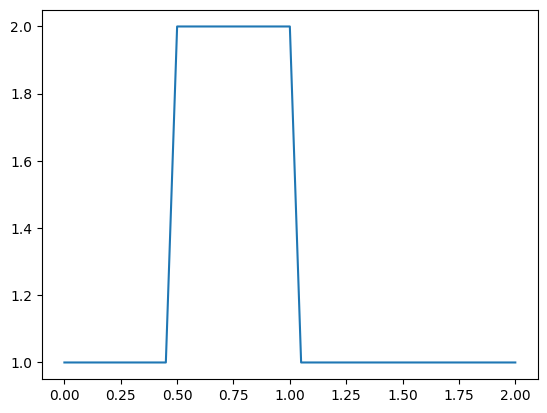

In [9]:
# plotting the initial conditions of the velocity in the space
plt.plot(np.linspace(0, total_x_lenght, number_grid_points_x),u)

#### 1.3 Solution strategy

With all of these conditions revisiting the Eq. (9)
   1. $c = 1$ 
   2. $\Delta t = 0.025$ 
   3. $\Delta x = 0.05$ 
   4. $u_i^n$ is the velocity in the i-th x coordinate at time n, starting with $t = 0$, $u_i^n = u_i^0$, then $u_i^0 \in u^0$
   5. $u_{i-1}^n$ is the velocity in the (i-1)-th x coordinate at time n, starting with $t = 0$, $u_{i-1}^n = u_{i-1}^0$, then $u_{i-1}^0 \in u^0$
   6. $u_i^{n+1}$ is the only unknown

Solving Eq. (9) for $u_i^{n+1}$ 

$$
\begin{equation}
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
\end{equation} \tag{10}
$$

The beginning of the calculation: with every element of the initial conditions array $u^0$ we need to perform the operation $u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$

For n = 0, starting with i = 1 (backward difference)
 
$$
\begin{eqnarray}
u_1^{1} = u_1^0 - c \frac{\Delta t}{\Delta x}(u_1^0-u_{0}^0) = 1 - 1 \frac{0.025}{0.05}(1-1) = 1\\
u_2^{1} = u_2^0 - c \frac{\Delta t}{\Delta x}(u_2^0-u_{1}^0) = 1 - 1 \frac{0.025}{0.05}(1-1) = 1\\
u_3^{1} = u_3^0 - c \frac{\Delta t}{\Delta x}(u_3^0-u_{2}^0) = 1 - 1 \frac{0.025}{0.05}(1-1) = 1\\
u_4^{1} = u_4^0 - c \frac{\Delta t}{\Delta x}(u_4^0-u_{3}^0) = 1 - 1 \frac{0.025}{0.05}(1-1) = 1\\
u_5^{1} = u_5^0 - c \frac{\Delta t}{\Delta x}(u_5^0-u_{4}^0) = 1 - 1 \frac{0.025}{0.05}(1-1) = 1\\
u_6^{1} = u_6^0 - c \frac{\Delta t}{\Delta x}(u_6^0-u_{5}^0) = 1 - 1 \frac{0.025}{0.05}(1-1) = 1\\
u_7^{1} = u_7^0 - c \frac{\Delta t}{\Delta x}(u_7^0-u_{6}^0) = 1 - 1 \frac{0.025}{0.05}(1-1) = 1\\
u_8^{1} = u_8^0 - c \frac{\Delta t}{\Delta x}(u_8^0-u_{7}^0) = 1 - 1 \frac{0.025}{0.05}(1-1) = 1\\
u_9^{1} = u_9^0 - c \frac{\Delta t}{\Delta x}(u_9^0-u_{8}^0) = 1 - 1 \frac{0.025}{0.05}(1-1) = 1\\
u_{10}^{1} = u_{10}^0 - c \frac{\Delta t}{\Delta x}(u_{10}^0-u_{9}^0) = 2 - 1 \frac{0.025}{0.05}(2-1) = 1.5\\
u_{11}^{1} = u_{11}^0 - c \frac{\Delta t}{\Delta x}(u_{11}^0-u_{10}^0) = 2 - 1 \frac{0.025}{0.05}(2-2) = 2\\
\cdots \\
\end{eqnarray}
$$

The $u^n$ solution will be stored in a new temporary array that will be used for the calculation of the next $u^{n+1}$ time step. Before the calculation this array will be filled with np.ones(). For the spatial calculations in each time step $u^n$ we use a inner for loop, and for cicling each time step we use an outer for loop. 

In [10]:
# creating the computational domain
un = np.ones(number_grid_points_x) 

# defining a results matrix
rows = number_of_timesteps
columns = number_grid_points_x
matrix = np.empty((rows+1, columns)) #the extra row will store the initial conditions

print(f'shape of the results matrix: {matrix.shape}')
initial_conditions = u.copy() # create a copy of the initial conditions

# storing the initial conditions np.array as time 0 solution
matrix[0,:] = initial_conditions

for n in range(number_of_timesteps): # run from 0 to number_of_timesteps times
    un = u.copy() #copy the existing values of u into un
    for i in range(1, number_grid_points_x): # with backward difference we must start with i = 1
        u[i] = un[i] - c*(dt/dx)*(un[i] - un[i-1])
    matrix[n+1,:] = u # store the results 

# relocate the initial conditions into u to do more simulations with the same initial conditions by default
u = initial_conditions

print(f'for t = 0 the results are: {matrix[0]}')
print(f'for t = 1 the results are: {matrix[1]}')

shape of the results matrix: (26, 41)
for t = 0 the results are: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
for t = 1 the results are: [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.5 2.  2.  2.  2.  2.  2.  2.
 2.  2.  2.  1.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1. ]


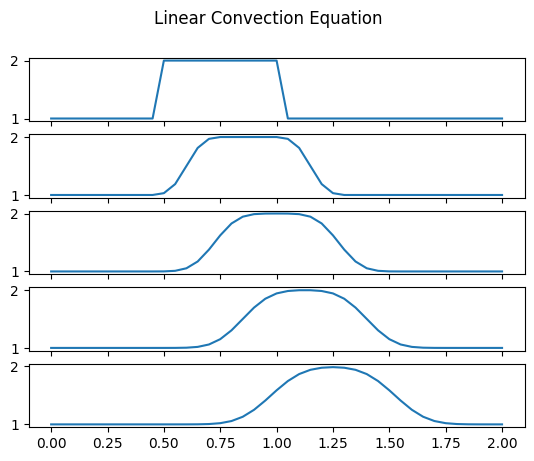

In [11]:
fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.suptitle('Linear Convection Equation')

for i in range(0,5):
    axs[i].plot(np.linspace(0, total_x_lenght, number_grid_points_x), matrix[i*5,:])

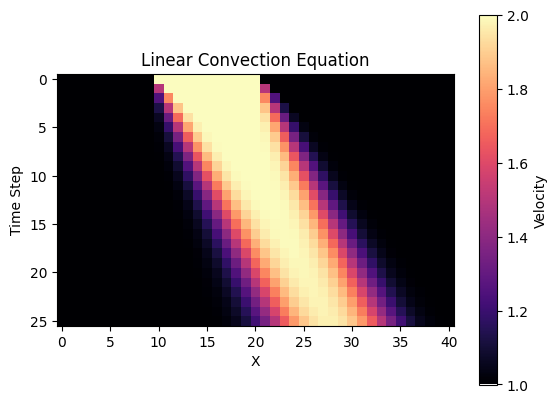

In [12]:
plt.imshow(matrix, cmap='magma')
plt.title("Linear Convection Equation")
plt.xlabel("X")
plt.ylabel("Time Step")
plt.colorbar().set_label("Velocity")
plt.show()

### Example 2. Solving with the finite difference method with forward time, forward space

#### 2.1 Discretization of temporal and spatial domains 

With `total_x_length` = 100,  the spatial domain is $x_i\in(0,100)$. The discretization of the temporal domain: 25 time steps with a length of $0.025s$ each timestep. Forward discretization for temporal and spatial domains Eq. (10).

In [17]:
total_x_length = 100
number_grid_points_x = 11
dx = total_x_length / (number_grid_points_x-1) 
number_of_timesteps = 25
dt = 3
c = 0.5 
print(dx)
print(dt)

10.0
3


#### 2.2. Initial conditions

$$
\[
U(x,0) = 
\begin{cases} 
e^{-0.01(x-45)^2} & \text{if } 20 \leq x \leq 70, \\
0 & \text{otherwise}.
\end{cases}
\]
$$

In [20]:
# computational domain
x_0 = np.linspace(0, total_x_length, number_grid_points_x)


# low bound of the range of the wave 
low = 20
# upper bound of the range of the wave
up = 70

#append an extra x = 0 to x_0 for the forward in space
x_0 = np.append(x_0, x_0[-1] + dx)
u_0 = np.where((x_0 >= low) & (x_0 <= up), np.exp(-0.01*(x_0-45)**2),0)

print(x_0)
print(u_0)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110.]
[0.         0.         0.00193045 0.10539922 0.77880078 0.77880078
 0.10539922 0.00193045 0.         0.         0.         0.        ]


In [21]:
un = np.zeros(number_grid_points_x+1) #temporary arrays of zeros

# defining a results matrix
rows = number_of_timesteps
columns = number_grid_points_x
matrix = np.empty((rows+1, columns+1))
print(matrix.shape)

# storing the initial conditions np.array as time 0 solution
matrix[0,:] = u_0

for n in range(number_of_timesteps): # run from 0 to number_of_timesteps times
    un = u_0.copy() #copy the existing values of u into un
    for i in range(1, number_grid_points_x): # with backward difference we must start with i = 1
        u_0[i] = un[i] - c*(dt/dx)*(un[i+1] - un[i])
    matrix[n+1,:] = u_0

print(matrix[0])
print(matrix[1])

(26, 12)
[0.         0.         0.00193045 0.10539922 0.77880078 0.77880078
 0.10539922 0.00193045 0.         0.         0.         0.        ]
[ 0.00000000e+00 -2.89568120e-04 -1.35898614e-02  4.38899079e-03
  7.78800783e-01  8.79811017e-01  1.20919540e-01  2.22002226e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]


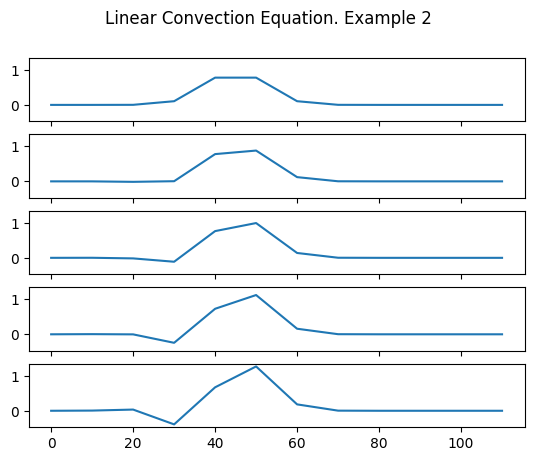

In [27]:
fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.suptitle('Linear Convection Equation. Example 2')

for i in range(0,5):
    axs[i].plot(np.linspace(0, total_x_length+dx, number_grid_points_x+1), matrix[i*1,:])